# EDA - dataset LYCOS-IDS2017

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the dataset

In [2]:
train_df = pd.read_parquet("../datasets/LYCOS-IDS2017/train_set.parquet")

# Creation of a bool column Attack (this will be done in the pipeline, as well as data cleaning and preprocessing)
train_df.rename(columns={'label': 'attack_type'}, inplace=True)
train_df['attack'] = train_df['attack_type'].apply(lambda x: False if x == 'benign' else True)

# Drop constant columns (also this will be done in the pipeline)
train_df.drop(columns=[col for col in train_df.columns if train_df[col].nunique() == 1], inplace=True)

# Drop useless columns (also this will be done in the pipeline)
train_df.drop(columns=['flow_id', 'src_addr', 'src_port', 'dst_addr', 'dst_port', 'timestamp'], inplace=True)

# Cast integer columns with min value 0 and max value 1 to bool (also this will be done in the pipeline)
columns_to_cast = [col for col in train_df.columns
                   if pd.api.types.is_integer_dtype(train_df[col]) and train_df[col].min() == 0 and train_df[col].max() == 1]
train_df[columns_to_cast] = train_df[columns_to_cast].astype(bool)

train_df.head()

ip_prot  flow_duration  down_up_ratio  pkt_len_max  pkt_len_min  \
11009         6          87753       2.000000       5792.0          0.0   
203721        6        5809661       0.333333          0.0          0.0   
100640       17         203112       1.000000        108.0         34.0   
37264         6        1049847       1.666667       5840.0          0.0   
169390        6        4464147       0.714286        504.0          0.0   

        pkt_len_mean   pkt_len_var  pkt_len_std    bytes_per_s   pkt_per_s  \
11009    1323.222222  3.816458e+06  1953.575682  135710.460041  102.560596   
203721      0.000000  0.000000e+00     0.000000       0.000000    0.688508   
100640     71.000000  1.825333e+03    42.723920    1398.243334   19.693568   
37264    1451.875000  4.829442e+06  2197.599238   11063.516874    7.620158   
169390     96.083333  2.451663e+04   156.577868     258.280025    2.688084   

        fwd_pkt_per_s  bwd_pkt_per_s  fwd_pkt_cnt  fwd_pkt_len_tot  \
11009       34.186865      68.373731            3              314   
203721       0.516381       0.172127            3                0   
100640       9.846784       9.846784            2               68   
37264        2.857559       4.762599            3               20   
169390       1.568049       1.120035            7              792   

        fwd_pkt_len_max  fwd_pkt_len_min  fwd_pkt_len_mean  fwd_pkt_len_std  \
11009             314.0              0.0        104.666667       181.287985   
203721              0.0              0.0          0.000000         0.000000   
100640             34.0             34.0         34.000000         0.000000   
37264              20.0              0.0          6.666667        11.547005   
169390            504.0              0.0        113.142857       192.863016   

        fwd_pkt_hdr_len_tot  fwd_pkt_hdr_len_min  fwd_non_empty_pkt_cnt  \
11009                   104                   32                      1   
203721                   72                   20                      0   
100640                   16                    8                      2   
37264                    72                   20                      1   
169390                  152                   20                      3   

        bwd_pkt_cnt  bwd_pkt_len_tot  bwd_pkt_len_max  bwd_pkt_len_min  \
11009             6            11595           5792.0              0.0   
203721            1                0              0.0              0.0   
100640            2              216            108.0              0.0   
37264             5            11595           5840.0              0.0   
169390            5              361            216.0              0.0   

        bwd_pkt_len_mean  bwd_pkt_len_std  bwd_pkt_hdr_len_tot  \
11009             1932.5      2181.008184                  200   
203721               0.0         0.000000                   32   
100640             108.0         0.000000                   16   
37264             2319.0      2438.258600                  112   
169390              72.2       102.000980                  112   

        bwd_pkt_hdr_len_min  bwd_non_empty_pkt_cnt    iat_max  iat_min  \
11009                    32                      4    75522.0      4.0   
203721                   32                      0  5758865.0    152.0   
100640                    8                      2   203104.0      4.0   
37264                    20                      3  1038361.0     18.0   
169390                   20                      2  4318549.0    106.0   

            iat_mean       iat_std  fwd_iat_tot  fwd_iat_max  fwd_iat_min  \
11009   1.096912e+04  2.635525e+04        11975      10991.0        984.0   
203721  1.936554e+06  3.310315e+06      5809661    5758865.0      50796.0   
100640  6.770400e+04  1.172598e+05            4          4.0          4.0   
37264   1.499781e+05  3.917590e+05        10684      10546.0        138.0   
169390  4.058315e+05  1.297832e+06      4464147    4318549.0        1

In [3]:
train_df.shape

(440632, 75)

In [4]:
train_df.describe().T

count          mean           std   min  \
ip_prot                 440632.0  9.503500e+00  5.170915e+00   1.0   
flow_duration           440632.0  8.678261e+06  2.642789e+07   0.0   
down_up_ratio           440632.0  1.184592e+00  4.837912e-01   0.0   
pkt_len_max             440632.0  2.220985e+03  3.052180e+03   0.0   
pkt_len_min             440632.0  1.396421e+01  2.384370e+01   0.0   
pkt_len_mean            440632.0  4.754604e+02  5.941198e+02   0.0   
pkt_len_var             440632.0  1.854025e+06  3.555714e+06   0.0   
pkt_len_std             440632.0  7.911159e+02  1.108226e+03   0.0   
bytes_per_s             440632.0  5.082052e+05  9.810097e+06   0.0   
pkt_per_s               440632.0  1.598493e+04  7.206411e+04   0.0   
fwd_pkt_per_s           440632.0  8.890982e+03  4.843917e+04   0.0   
bwd_pkt_per_s           440632.0  7.093944e+03  3.332468e+04   0.0   
fwd_pkt_cnt             440632.0  7.636674e+00  5.803208e+02   0.0   
fwd_pkt_len_tot         440632.0  4.521193e+02  3.910945e+03   0.0   
fwd_pkt_len_max         440632.0  1.914756e+02  4.149469e+02   0.0   
fwd_pkt_len_min         440632.0  1.416258e+01  3.088242e+01   0.0   
fwd_pkt_len_mean        440632.0  5.667407e+01  9.125393e+01   0.0   
fwd_pkt_len_std         440632.0  7.375339e+01  1.388870e+02   0.0   
fwd_pkt_hdr_len_tot     440632.0  1.841412e+02  1.210990e+04   0.0   
fwd_pkt_hdr_len_min     440632.0  2.186178e+01  1.111408e+01   0.0   
fwd_non_empty_pkt_cnt   440632.0  2.125320e+00  5.352951e+00   0.0   
bwd_pkt_cnt             440632.0  9.351019e+00  7.812449e+02   0.0   
bwd_pkt_len_tot         440632.0  1.428061e+04  1.741399e+06   0.0   
bwd_pkt_len_max         440632.0  2.195063e+03  3.052522e+03   0.0   
bwd_pkt_len_min         440632.0  1.033379e-01  4.473702e+00   0.0   
bwd_pkt_len_mean        440632.0  7.413841e+02  9.431616e+02   0.0   
bwd_pkt_len_std         440632.0  9.148557e+02  1.368627e+03   0.0   
bwd_pkt_hdr_len_tot     440632.0  2.215679e+02  1.563308e+04   0.0   
bwd_pkt_hdr_len_min     440632.0  1.951313e+01  9.664073e+00   0.0   
bwd_non_empty_pkt_cnt   440632.0  7.376800e+00  7.808739e+02   0.0   
iat_max                 440632.0  3.571307e+06  1.278038e+07   0.0   
iat_min                 440632.0  1.754194e+04  2.754854e+05 -13.0   
iat_mean                440632.0  6.962276e+05  3.112088e+06   0.0   
iat_std                 440632.0  1.348117e+06  5.587976e+06   0.0   
fwd_iat_tot             440632.0  8.334334e+06  2.631179e+07   0.0   
fwd_iat_max             440632.0  3.393189e+06  1.276589e+07   0.0   
fwd_iat_min             440632.0  9.017748e+05  8.281070e+06   0.0   
fwd_iat_mean            440632.0  1.525229e+06  8.584116e+06   0.0   
fwd_iat_std             440632.0  9.886572e+05  3.995777e+06   0.0   
bwd_iat_tot             440632.0  7.706655e+06  2.549285e+07   0.0   
bwd_iat_max             440632.0  2.977515e+06  1.238323e+07   0.0   
bwd_iat_min             440632.0  1.024204e+06  8.568776e+06   0.0   
bwd_iat_mean            440632.0  1.610863e+06  9.145996e+06   0.0   
bwd_iat_std             440632.0  8.272209e+05  4.248374e+06   0.0   
active_max              440632.0  1.497544e+05  9.883660e+05   0.0   
active_min              440632.0  5.950706e+04  6.239059e+05   0.0   
active_mean             440632.0  8.397395e+04  6.857093e+05   0.0   
active_std              440632.0  4.240003e+04  3.896272e+05   0.0   
idle_max                440632.0  3.076430e+06  1.254480e+07   0.0   
idle_min                440632.0  2.697717e+06  1.180019e+07   0.0   
idle_mean               440632.0  2.876925e+06  1.200787e+07   0.0   
idle_std                440632.0  1.976503e+05  2.052808e+06   0.0   
flag_SYN                440632.0  1.206211e+00  1.032307e+00   0.0   
flag_ack                440632.0  1.502514e+01  1.361420e+03   0.0   
flag_psh                440632.0  2.625397e+00  2.261447e+01   0.0   
fwd_flag_psh            440632.0  1.239290e+00  3.895170e+00   0.0   
bwd_flag_psh            440632.0  1.3

## Data Cleaning Checks

### Missing Values

In [5]:
train_df.isnull().sum()

ip_prot                   0
flow_duration             0
down_up_ratio             0
pkt_len_max               0
pkt_len_min               0
pkt_len_mean              0
pkt_len_var               0
pkt_len_std               0
bytes_per_s               0
pkt_per_s                 0
fwd_pkt_per_s             0
bwd_pkt_per_s             0
fwd_pkt_cnt               0
fwd_pkt_len_tot           0
fwd_pkt_len_max           0
fwd_pkt_len_min           0
fwd_pkt_len_mean          0
fwd_pkt_len_std           0
fwd_pkt_hdr_len_tot       0
fwd_pkt_hdr_len_min       0
fwd_non_empty_pkt_cnt     0
bwd_pkt_cnt               0
bwd_pkt_len_tot           0
bwd_pkt_len_max           0
bwd_pkt_len_min           0
bwd_pkt_len_mean          0
bwd_pkt_len_std           0
bwd_pkt_hdr_len_tot       0
bwd_pkt_hdr_len_min       0
bwd_non_empty_pkt_cnt     0
iat_max                   0
iat_min                   0
iat_mean                  0
iat_std                   0
fwd_iat_tot               0
fwd_iat_max         

### Duplicate Rows

In [6]:
train_df[train_df.duplicated()].head()

ip_prot  flow_duration  down_up_ratio  pkt_len_max  pkt_len_min  \
38592         6             49            1.0          0.0          0.0   
139212        6             43            1.0          0.0          0.0   
33768         6             44            1.0          0.0          0.0   
151348        6             11            1.0          0.0          0.0   
159122        6             49            1.0          0.0          0.0   

        pkt_len_mean  pkt_len_var  pkt_len_std  bytes_per_s      pkt_per_s  \
38592            0.0          0.0          0.0          0.0   40816.326531   
139212           0.0          0.0          0.0          0.0   46511.627907   
33768            0.0          0.0          0.0          0.0   45454.545455   
151348           0.0          0.0          0.0          0.0  181818.181818   
159122           0.0          0.0          0.0          0.0   40816.326531   

        fwd_pkt_per_s  bwd_pkt_per_s  fwd_pkt_cnt  fwd_pkt_len_tot  \
38592    20408.163265   20408.163265            1                0   
139212   23255.813953   23255.813953            1                0   
33768    22727.272727   22727.272727            1                0   
151348   90909.090909   90909.090909            1                0   
159122   20408.163265   20408.163265            1                0   

        fwd_pkt_len_max  fwd_pkt_len_min  fwd_pkt_len_mean  fwd_pkt_len_std  \
38592               0.0              0.0               0.0              0.0   
139212              0.0              0.0               0.0              0.0   
33768               0.0              0.0               0.0              0.0   
151348              0.0              0.0               0.0              0.0   
159122              0.0              0.0               0.0              0.0   

        fwd_pkt_hdr_len_tot  fwd_pkt_hdr_len_min  fwd_non_empty_pkt_cnt  \
38592                    24                   24                      0   
139212                   40                   40                      0   
33768                    24                   24                      0   
151348                   24                   24                      0   
159122                   24                   24                      0   

        bwd_pkt_cnt  bwd_pkt_len_tot  bwd_pkt_len_max  bwd_pkt_len_min  \
38592             1                0              0.0              0.0   
139212            1                0              0.0              0.0   
33768             1                0              0.0              0.0   
151348            1                0              0.0              0.0   
159122            1                0              0.0              0.0   

        bwd_pkt_len_mean  bwd_pkt_len_std  bwd_pkt_hdr_len_tot  \
38592                0.0              0.0                   20   
139212               0.0              0.0                   20   
33768                0.0              0.0                   20   
151348               0.0              0.0                   20   
159122               0.0              0.0                   20   

        bwd_pkt_hdr_len_min  bwd_non_empty_pkt_cnt  iat_max  iat_min  \
38592                    20                      0     49.0     49.0   
139212                   20                      0     43.0     43.0   
33768                    20                      0     44.0     44.0   
151348                   20                      0     11.0     11.0   
159122                   20                      0     49.0     49.0   

        iat_mean  iat_std  fwd_iat_tot  fwd_iat_max  fwd_iat_min  \
38592       49.0      0.0            0          0.0          0.0   
139212      43.0      0.0            0          0.0          0.0   
33768       44.0      0.0            0          0.0          0.0   
151348      11.0      0.0            0          0.0          0.0   
159122      49.0      0.0            0          0.0          0.0   

        fwd_iat_mean  fwd_iat_std  bwd_iat_tot  bwd_iat_m

In [7]:
# Exclude duplicate rows from train_data (also this will be done in the pipeline)
train_df = train_df[~train_df.duplicated()]

In [8]:
train_df.shape

(352816, 75)

## EDA

### Univariate Analysis

For each non-numerical column, show the values and plot the distribution

Column flag_fin
------------------------------
Unique Values (2): [ True False]

Value Counts:
True     203944
False    148872
Name: flag_fin, dtype: int64



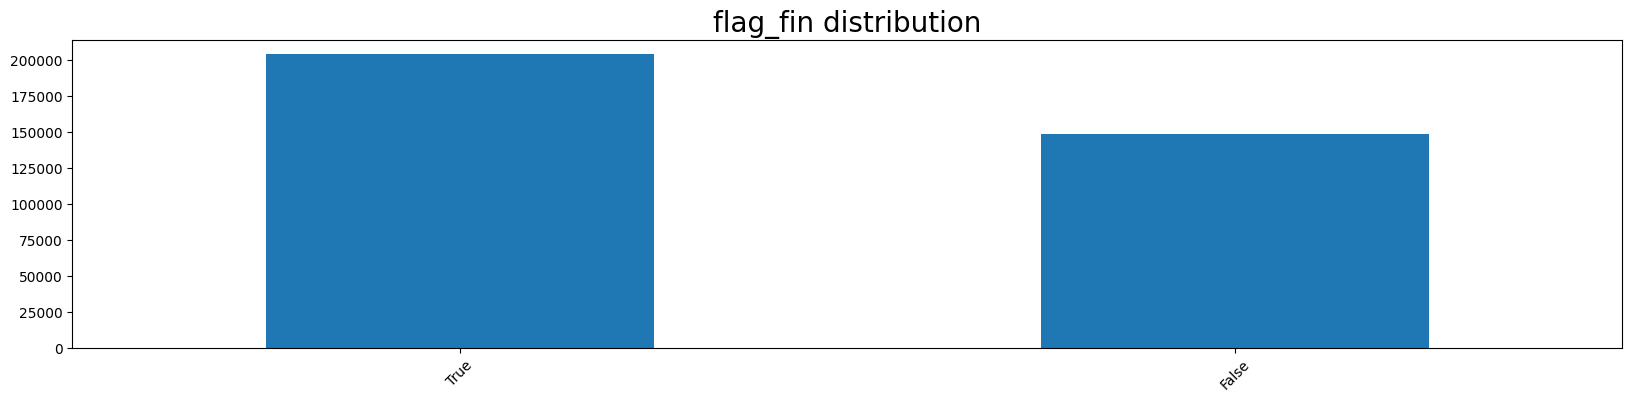

Column flag_rst
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    347373
True       5443
Name: flag_rst, dtype: int64



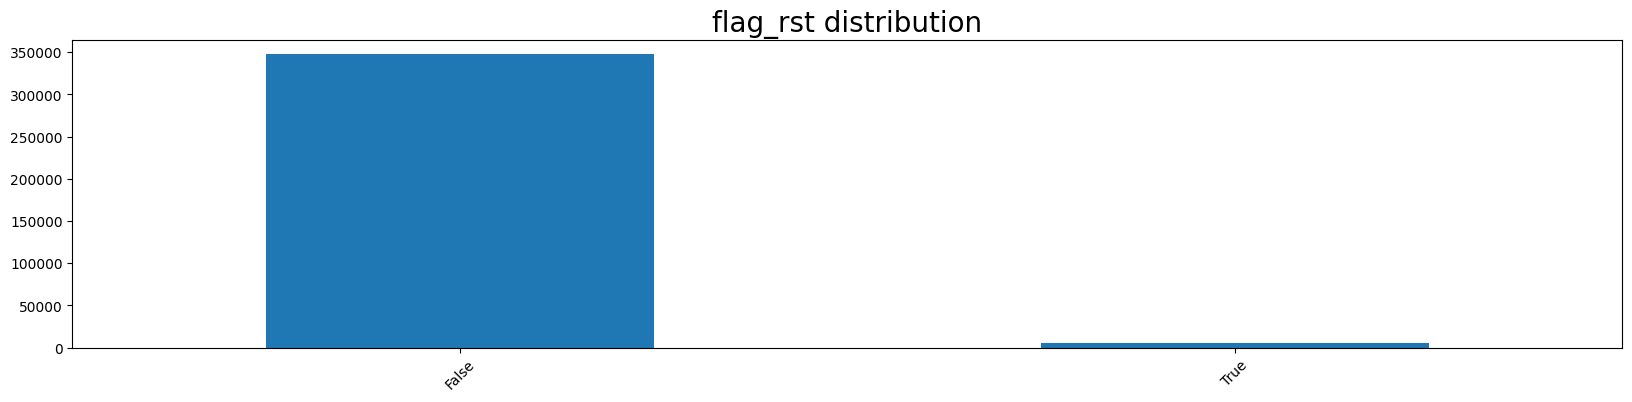

Column attack_type
------------------------------
Unique Values (14): ['dos_hulk' 'benign' 'ddos' 'portscan' 'dos_slowhttptest' 'dos_slowloris'
 'dos_goldeneye' 'ftp_patator' 'bot' 'ssh_patator' 'webattack_bruteforce'
 'webattack_xss' 'heartbleed' 'webattack_sql_injection']

Value Counts:
benign                     211237
dos_hulk                    79487
ddos                        47841
dos_goldeneye                3382
dos_slowloris                2657
dos_slowhttptest             2381
ftp_patator                  1997
ssh_patator                  1479
portscan                      971
webattack_bruteforce          680
bot                           367
webattack_xss                 326
webattack_sql_injection         6
heartbleed                      5
Name: attack_type, dtype: int64



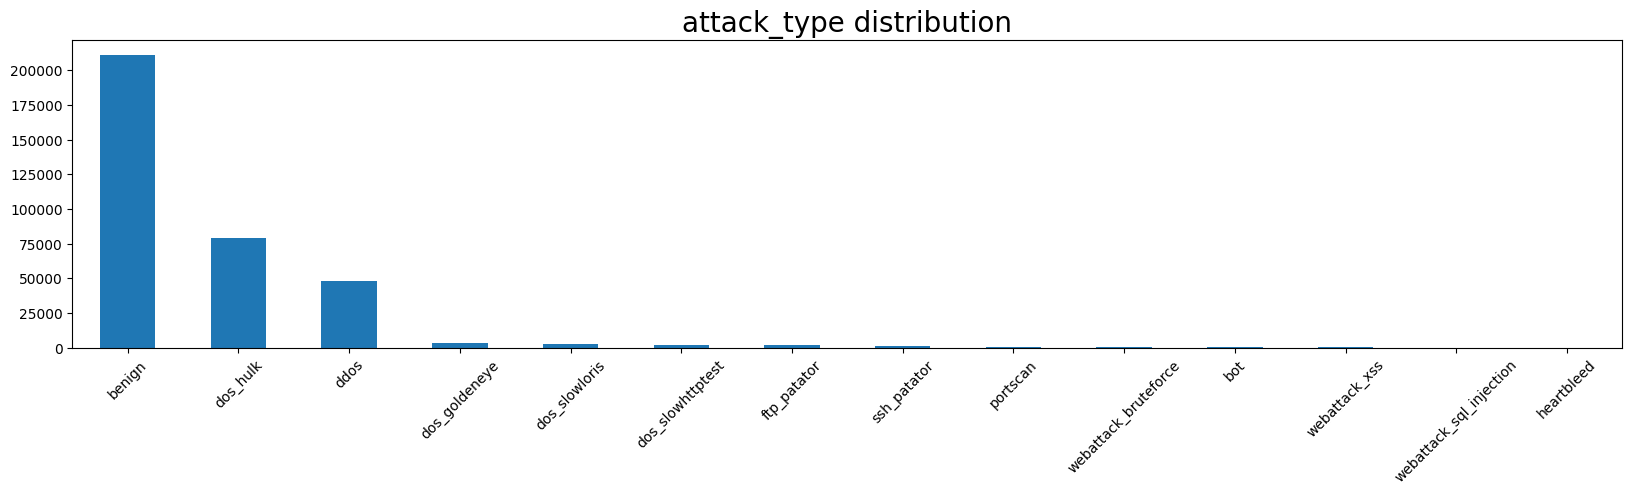

Column attack
------------------------------
Unique Values (2): [ True False]

Value Counts:
False    211237
True     141579
Name: attack, dtype: int64



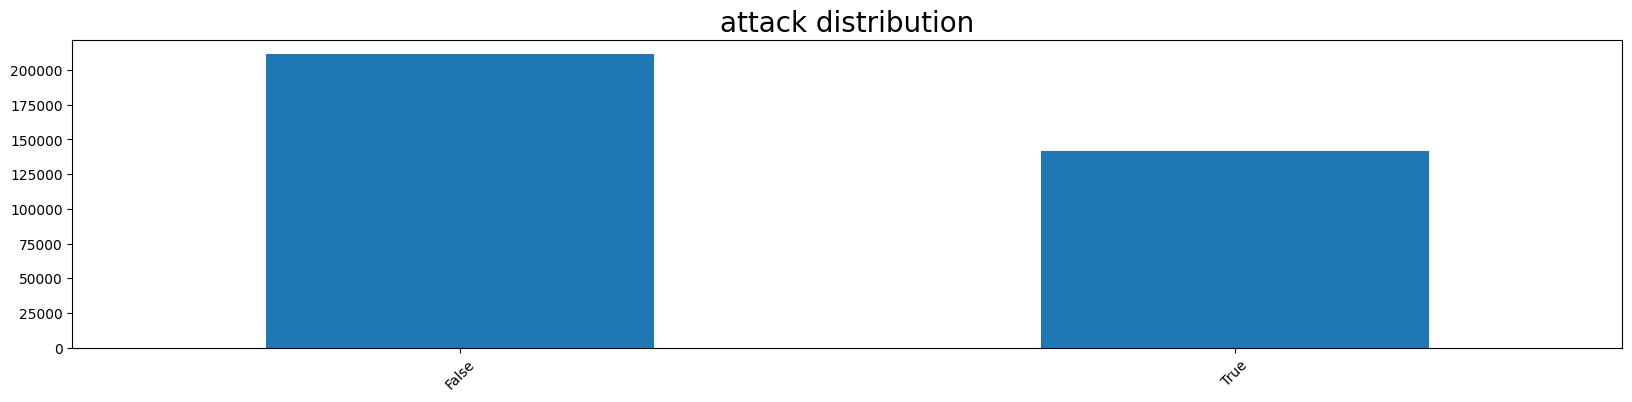

In [9]:
# Non-numerical columns
non_numerical_columns = train_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Show the distribution for each one
for column_name in non_numerical_columns:
    print(f"Column {column_name}\n{'-'*30}")
    unique_vals = train_df[column_name].unique()
    value_counts = train_df[column_name].value_counts()
    print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
    print(f"Value Counts:\n{value_counts}\n{'='*40}\n")
    plt.figure(figsize=(20,4))
    value_counts.plot(kind="bar")
    plt.title(f"{column_name} distribution", fontsize=20)
    plt.xticks(rotation=45)
    plt.show()

Violin plot for each numerical feature

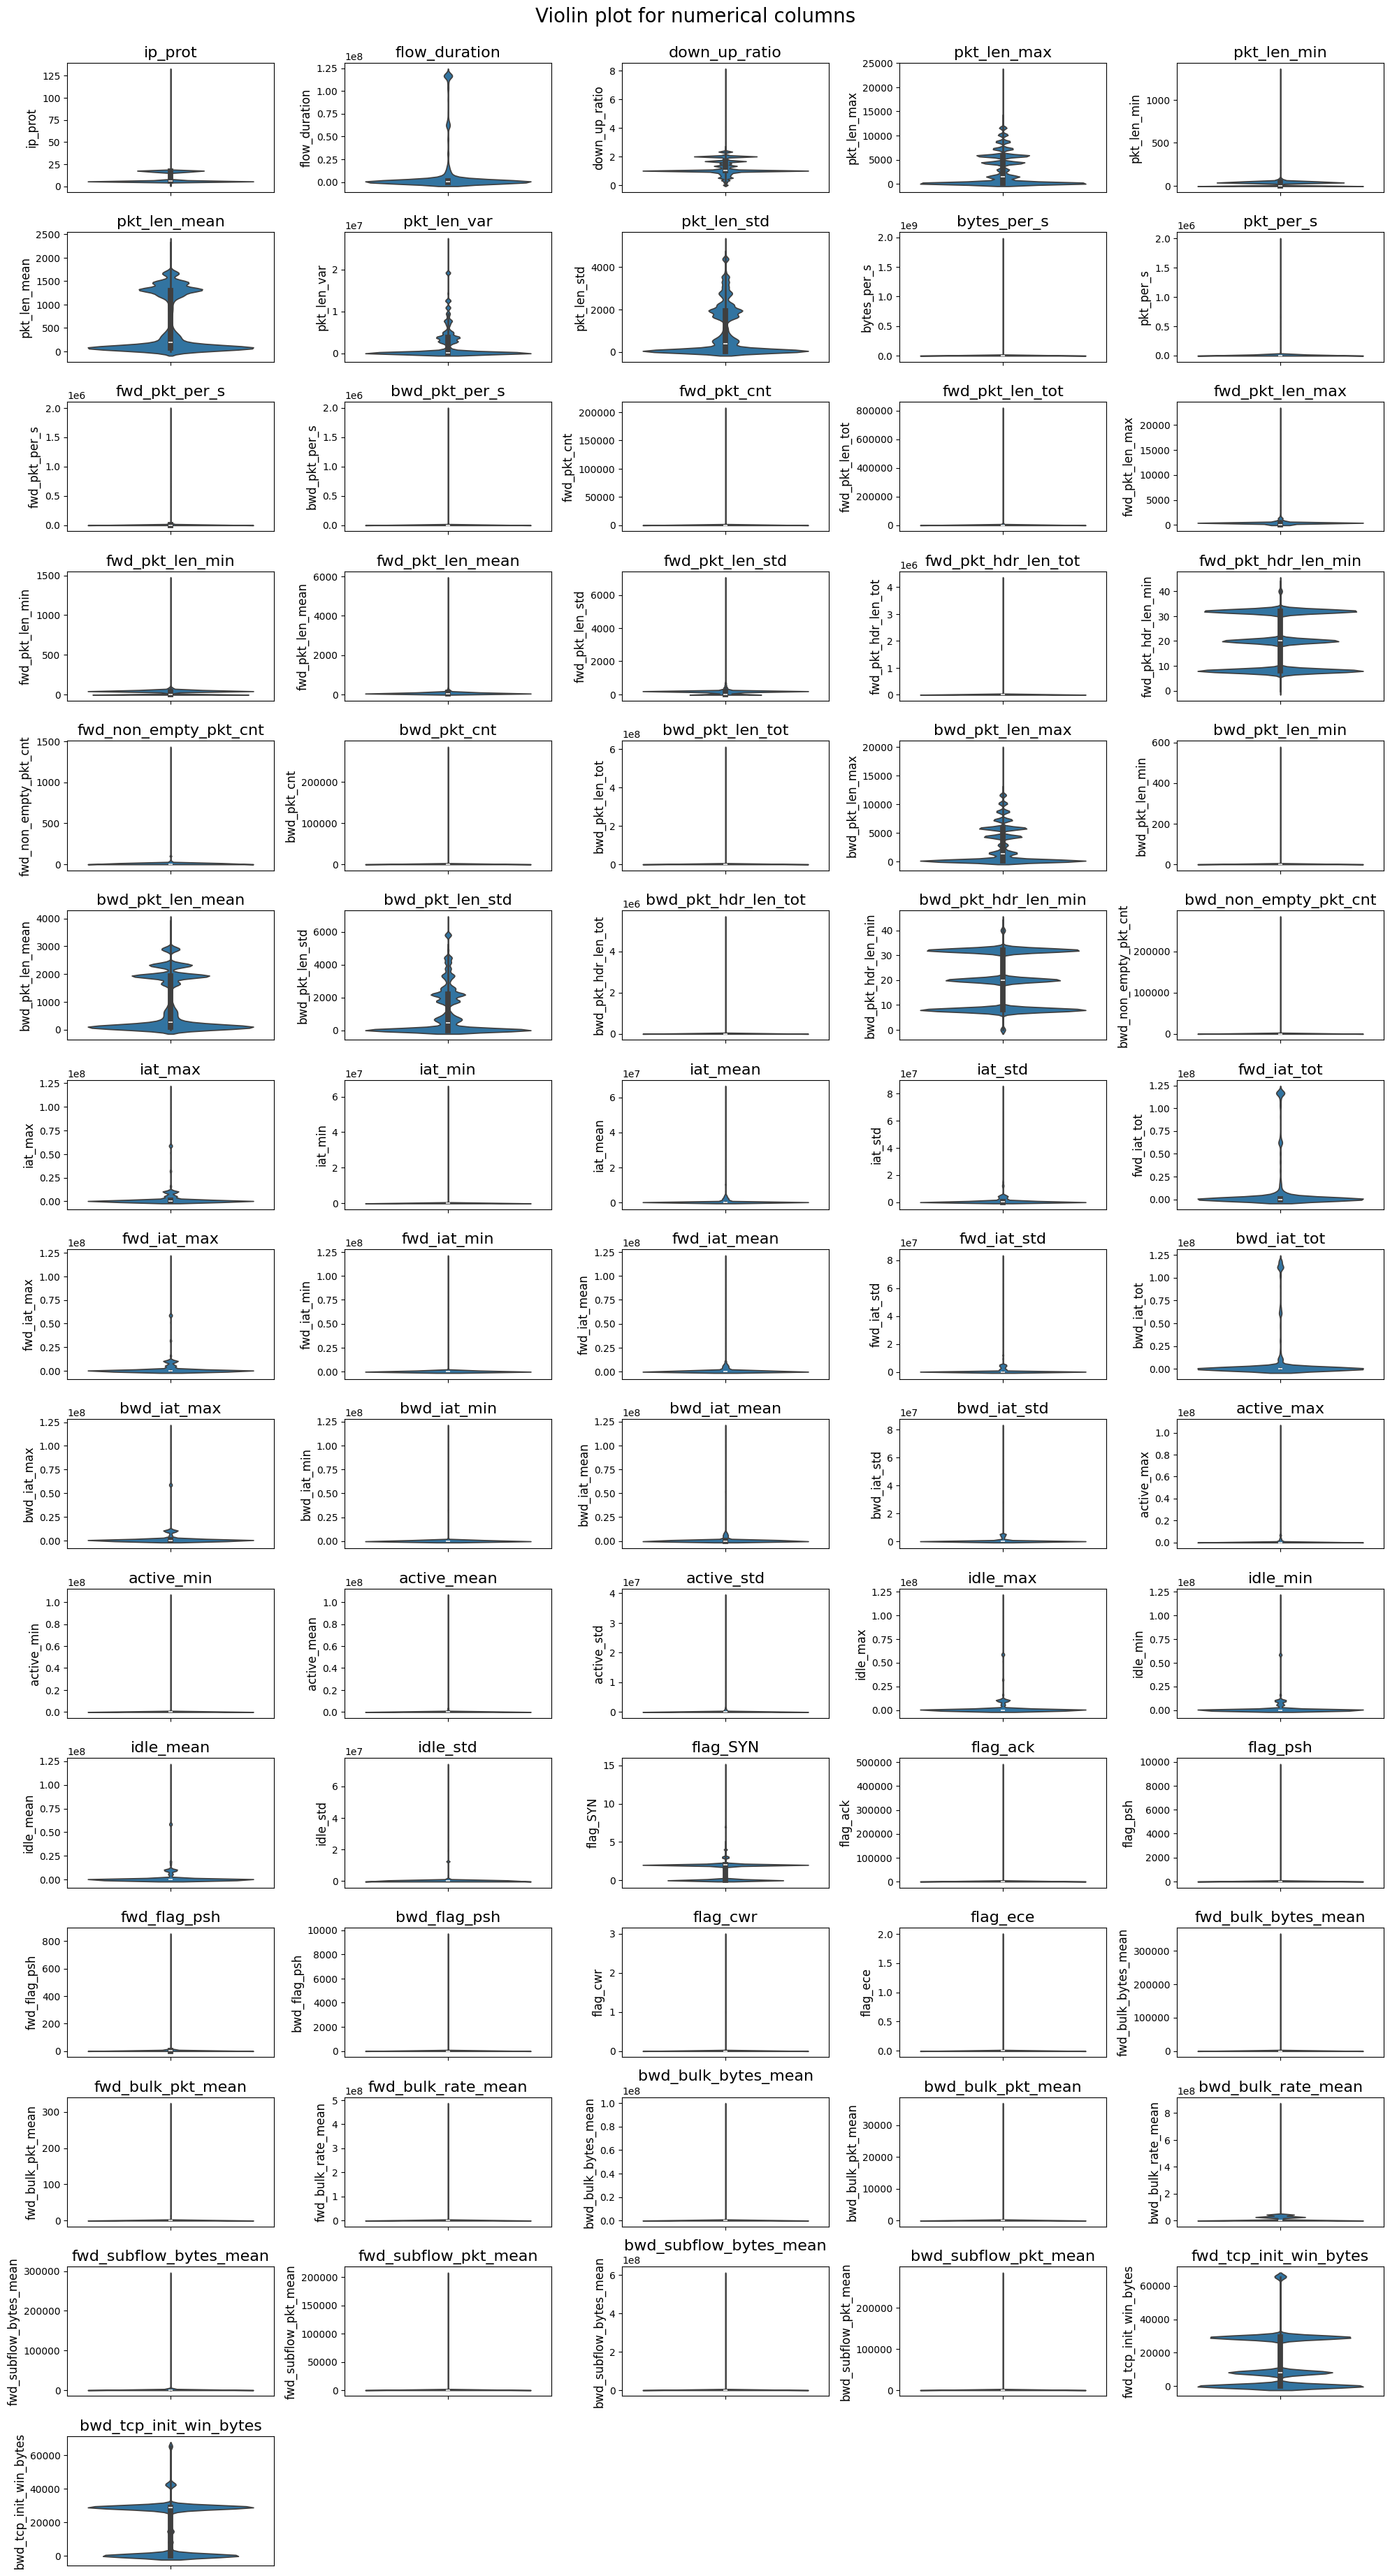

In [10]:
# Numerical columns
numerical_columns = train_df.select_dtypes(exclude=['object', 'category', 'bool']).columns.tolist()

# Create subplots for violin plots
fig, axes = plt.subplots(16, 5, figsize=(20, 40))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate a violin plot for each numerical column
for i, col in enumerate(numerical_columns):
    sns.violinplot(data=train_df, y=col, ax=axes[i])
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=12)

# Remove any extra subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Violin plot for numerical columns', fontsize=20)
plt.subplots_adjust(top=0.96)
plt.show()

Semi-log histogram for each numerical feature

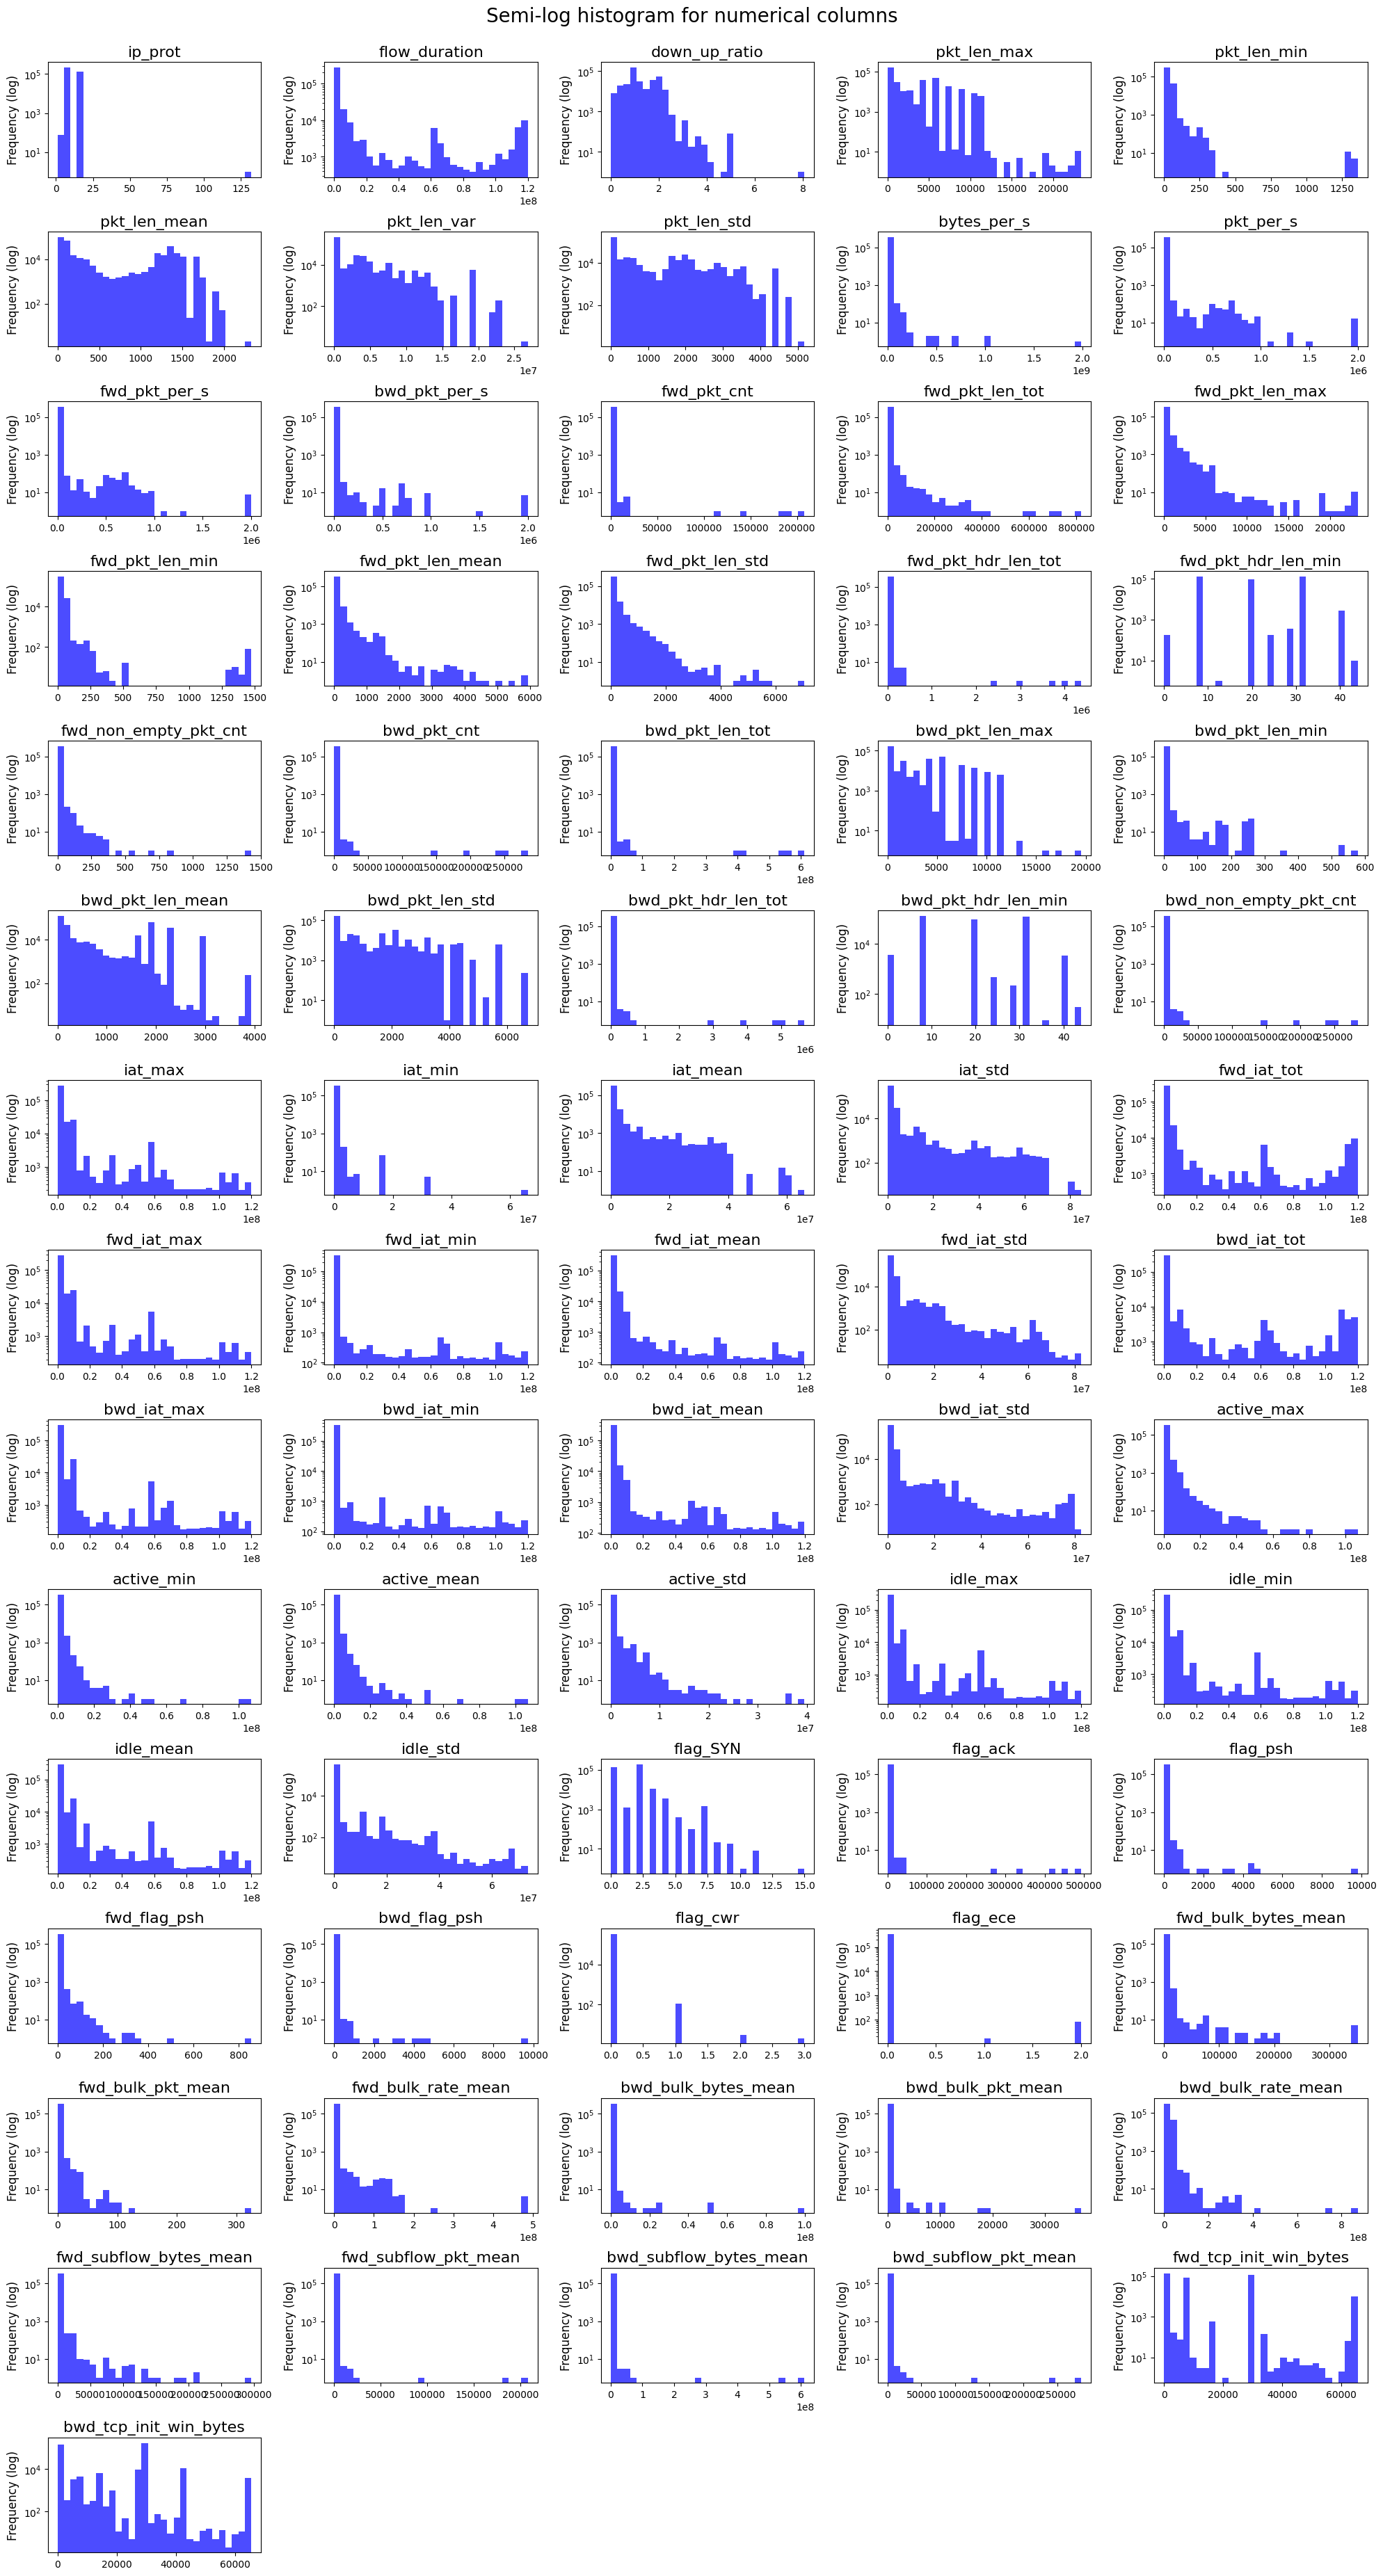

In [11]:
# Create subplots for semi-log histograms
fig, axes = plt.subplots(16, 5, figsize=(20, 40))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate a semi-log histogram for each numerical column
for i, col in enumerate(numerical_columns):
    axes[i].hist(train_df[col], bins=30, log=True, color='blue', alpha=0.7)
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency (log)', fontsize=12)

# Remove any extra subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Semi-log histogram for numerical columns', fontsize=20)
plt.subplots_adjust(top=0.96)
plt.show()

Plot the distributions of Attack and Attack Types with percentages

In [12]:
def plot_distribution_with_percentages(col_name):
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(data=train_df, x=col_name, hue=col_name, legend=False)
    total = len(train_df)
    for p in ax.patches:
        count = int(p.get_height())
        percentage = 100 * count / total
        if percentage > 0:
            ax.annotate(f'{count} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., p.get_height() * 0.985), 
                    ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Distribution of {col_name} with percentages", fontsize=20)
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.show()

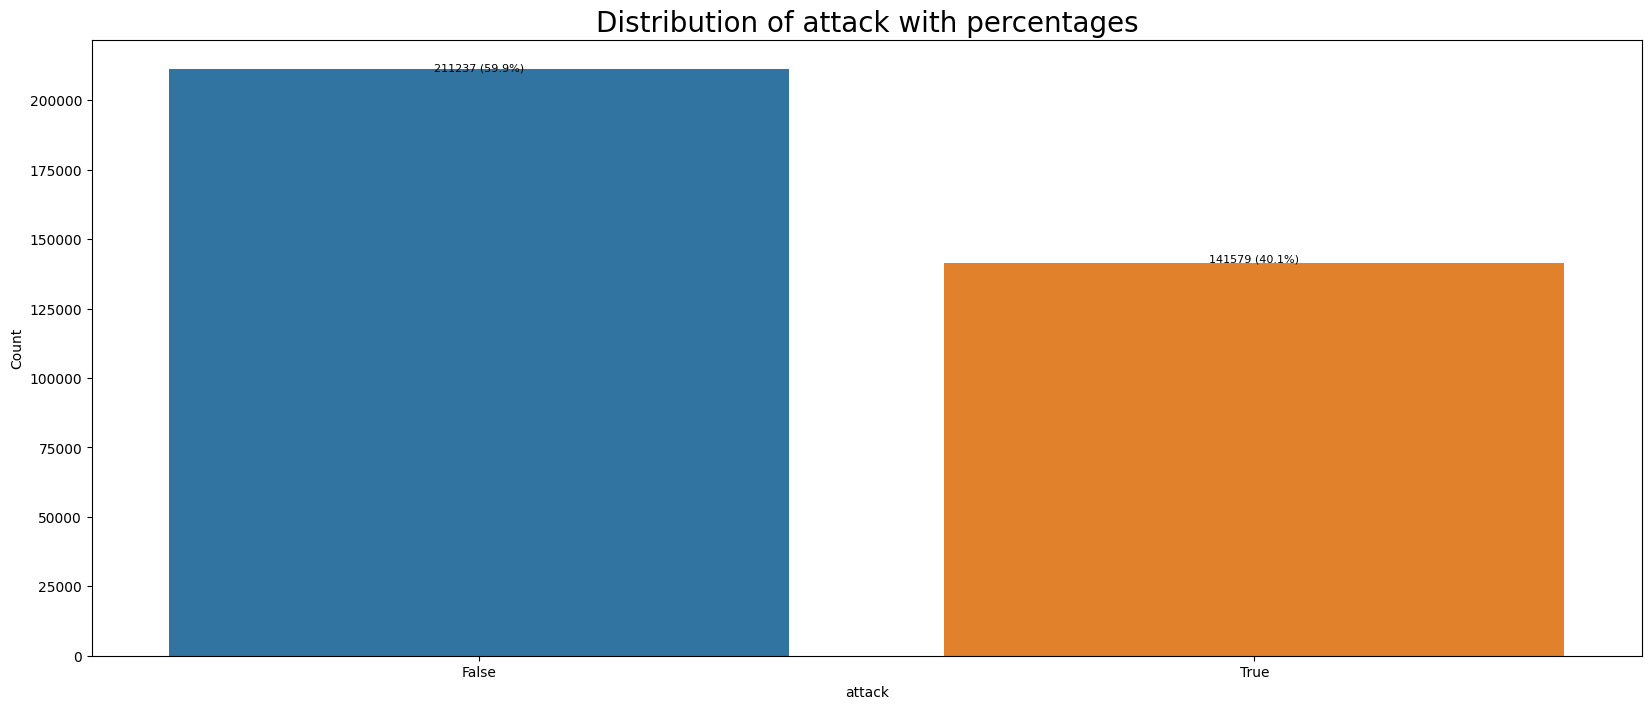

In [13]:
# Distribution of Attack with percentages
plot_distribution_with_percentages('attack')

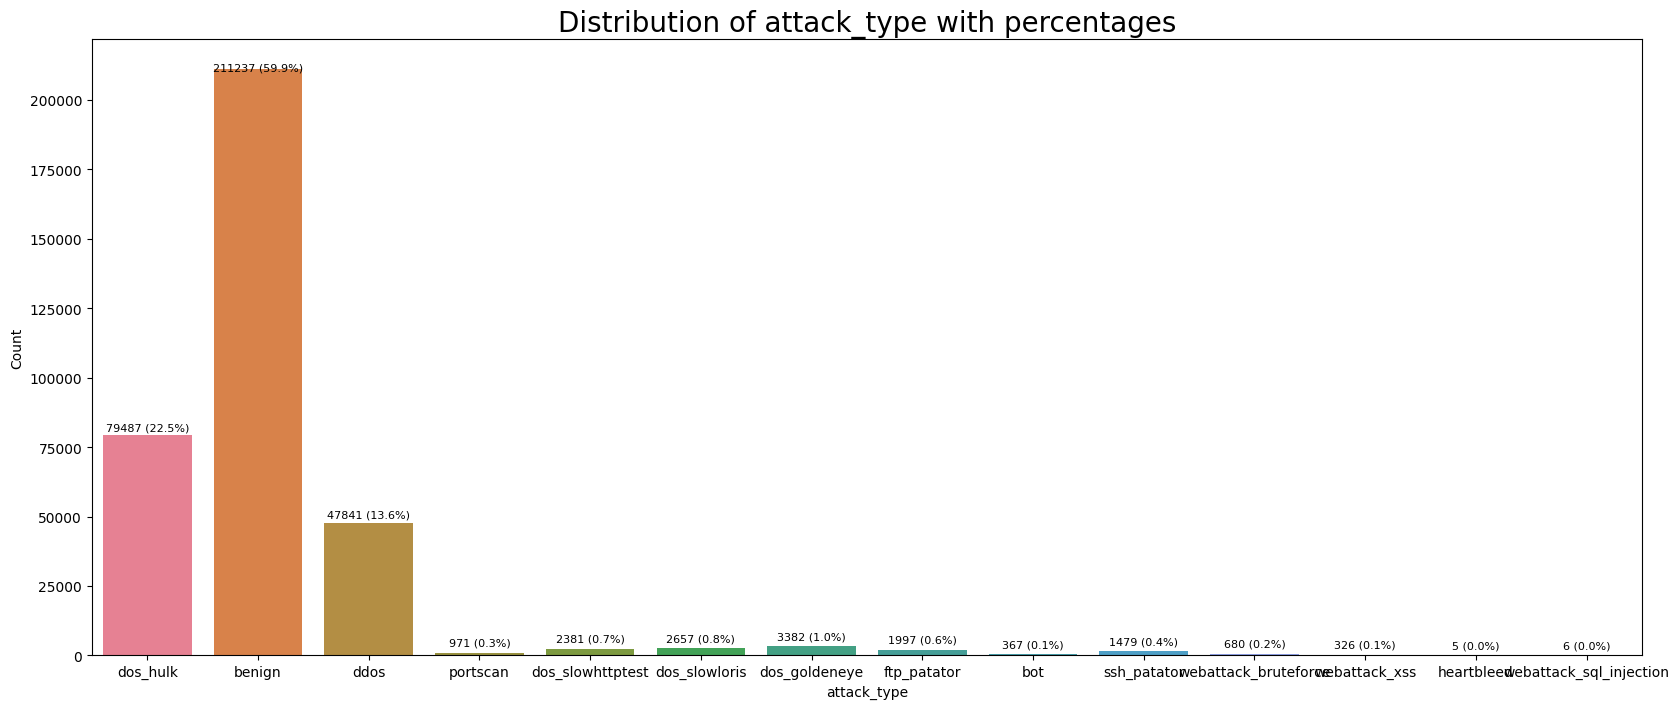

In [14]:
# Distribution of Attack Type with percentages
plot_distribution_with_percentages('attack_type')

### Covariate Analysis

In [15]:
# Compare column vs column
def hist_col_vs_col(col1, col2, top_n=10):
    # Get the top N categories by count in col2, to avoid a huge plot
    top_categories = train_df[col2].value_counts().head(top_n).index
    filtered_df = train_df[train_df[col2].isin(top_categories)]
    
    # Set dynamic title
    title_suffix = f" (top {top_n} for {col2})" if train_df[col2].nunique() > top_n else ""
    title = f'{col1} vs {col2}{title_suffix}'
    
    plt.figure(figsize=(20, 8))
    sns.countplot(x=col1, data=filtered_df, hue=col2, palette=sns.color_palette("dark", as_cmap=False, n_colors=filtered_df[col2].nunique()))
    plt.xticks(rotation=45)
    plt.title(title, fontsize=20)
    plt.legend(title=col2)
    plt.show()

Compare Attack vs Protocol Number

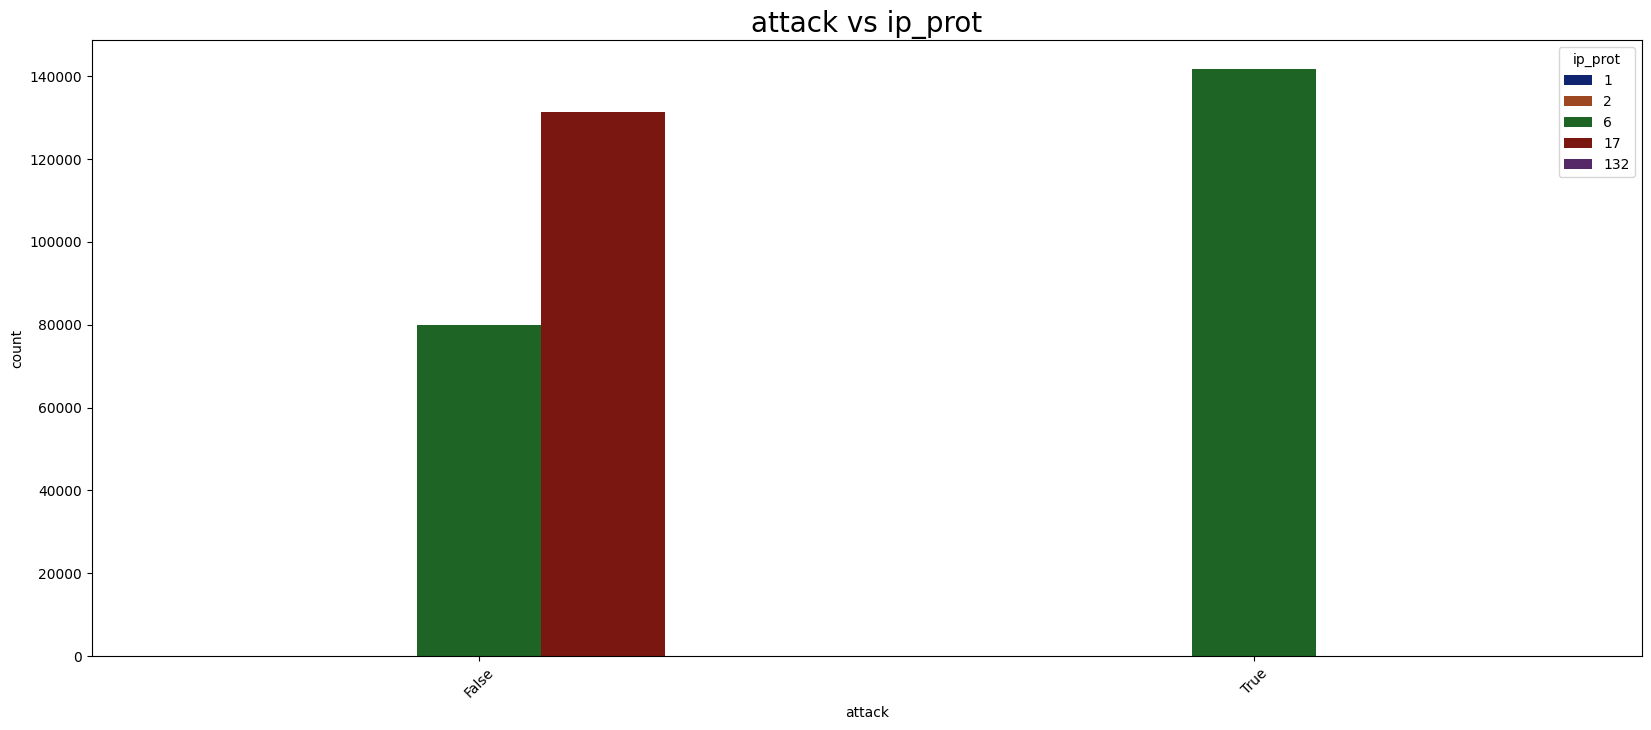

In [16]:
hist_col_vs_col('attack', 'ip_prot')

Compare Attack Type vs Protocol Number

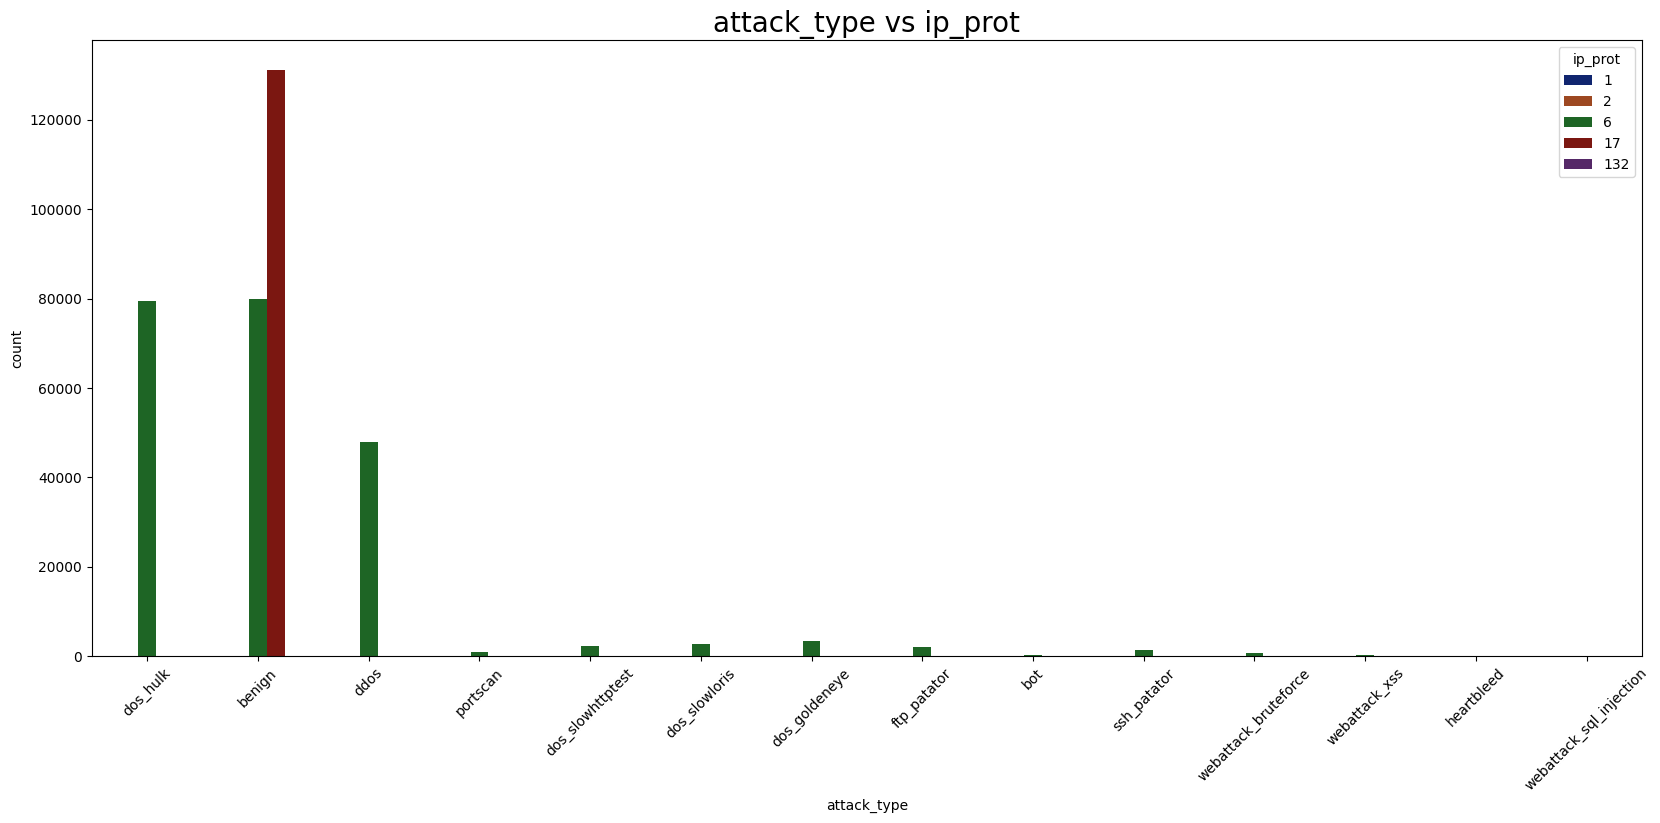

In [17]:
hist_col_vs_col('attack_type', 'ip_prot')

Compare Flag SYN vs Attack

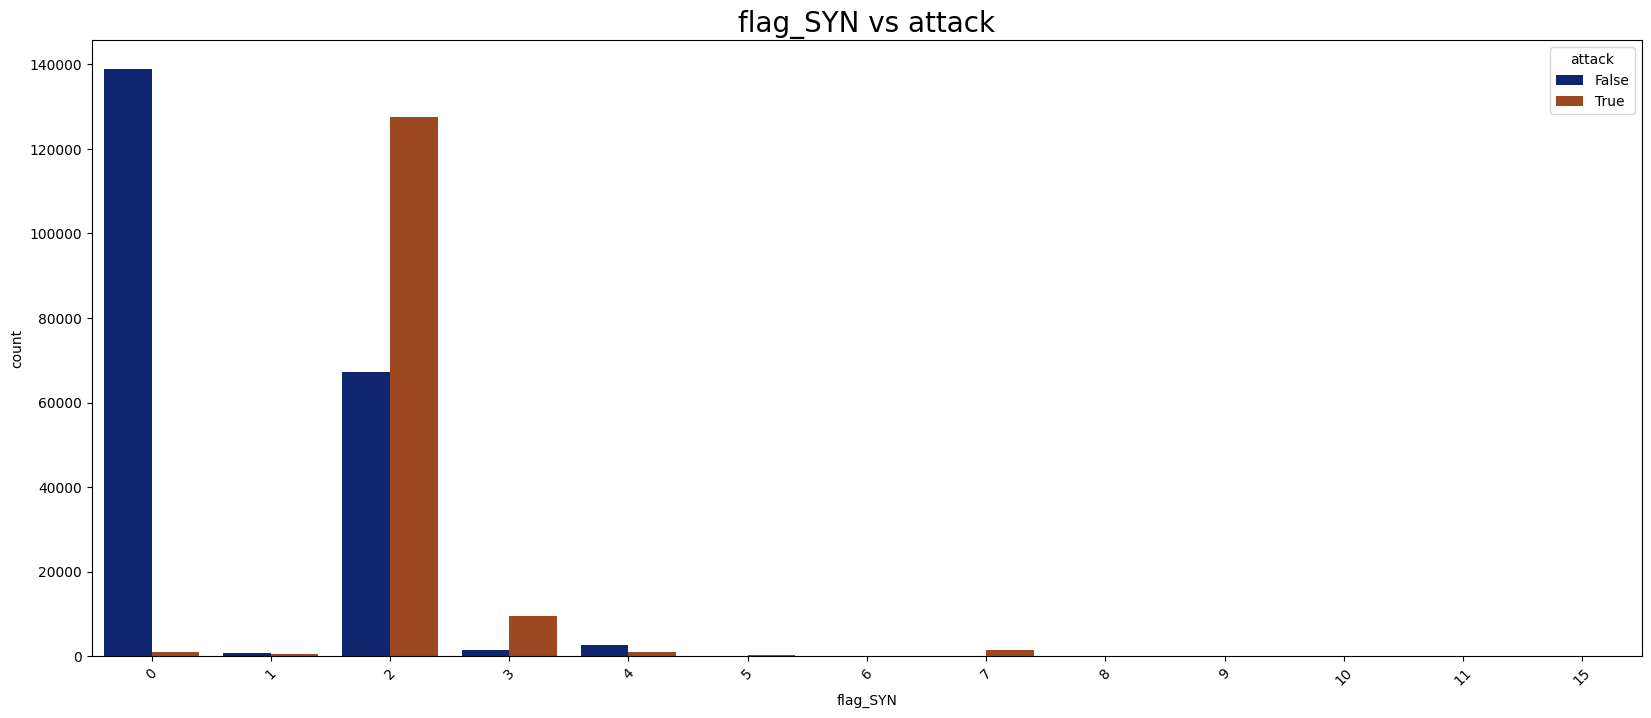

In [18]:
hist_col_vs_col('flag_SYN', 'attack')

Correlation matrix, useful for finding very correlated features

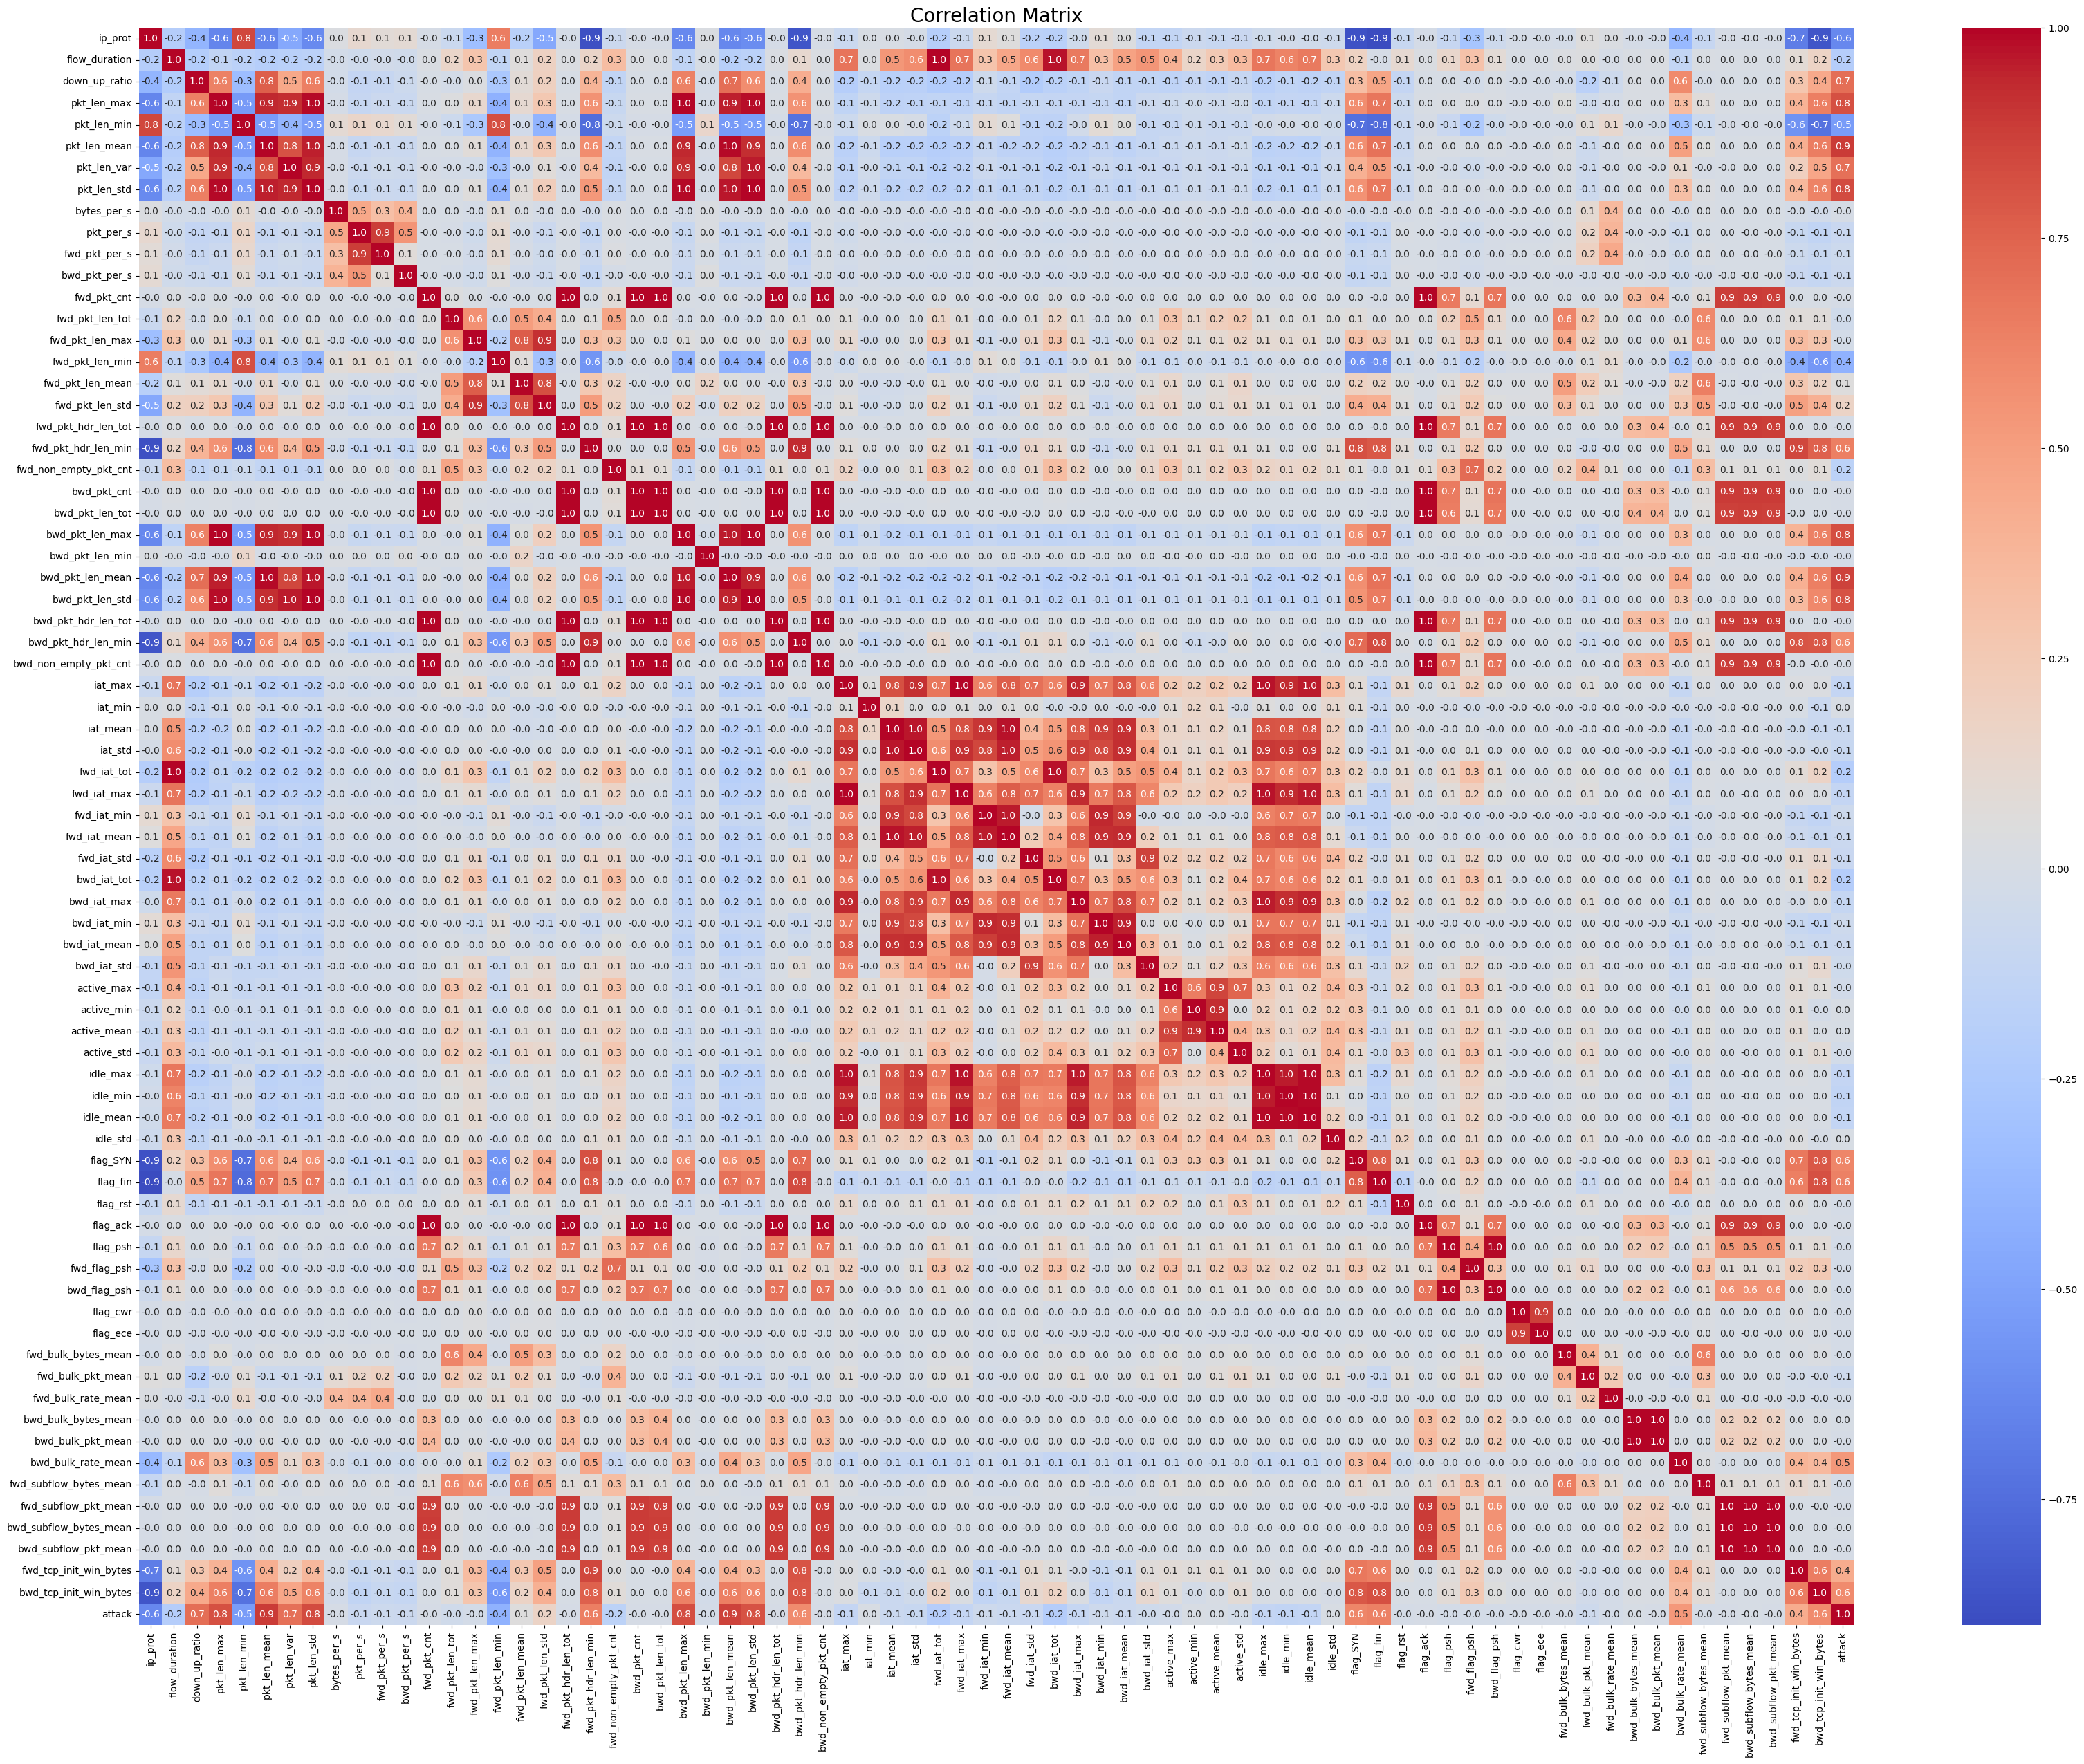

In [19]:
plt.figure(figsize=(40, 30))
correlation_matrix = train_df[train_df.select_dtypes(exclude=['object', 'category']).columns.tolist()].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 10})
plt.title("Correlation Matrix", fontsize=20)
plt.show()

Compare the subset of most correlated (|corr| > 0.5) features vs Attack

In [20]:
def compare_feature_target(feature_name):
    # Set up the plotting area with only two columns for histogram and violin plot
    _, axes = plt.subplots(1, 2, figsize=(14, 3))

    # Histogram
    sns.histplot(train_df[feature_name], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Histogram of {feature_name}", fontsize=20)
    axes[0].set_xlabel(feature_name)

    # Violin plot colored by Attack
    sns.violinplot(data=train_df, x='attack', y=feature_name, hue='attack', ax=axes[1])
    axes[1].set_title(f"Violin Plot of {feature_name} by Attack", fontsize=20)
    axes[1].get_legend().remove()

    plt.tight_layout()
    plt.show()

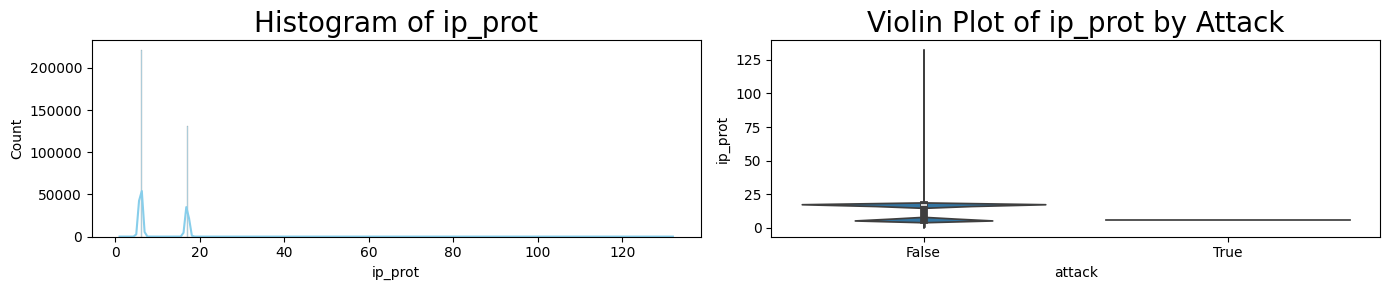

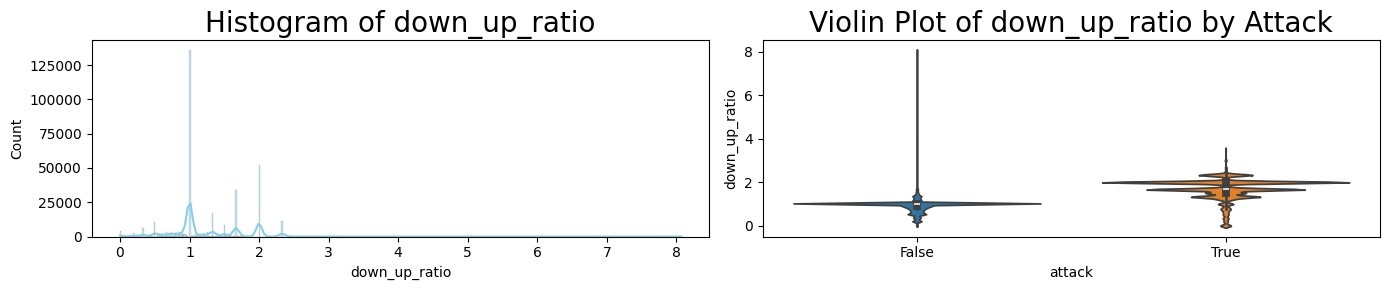

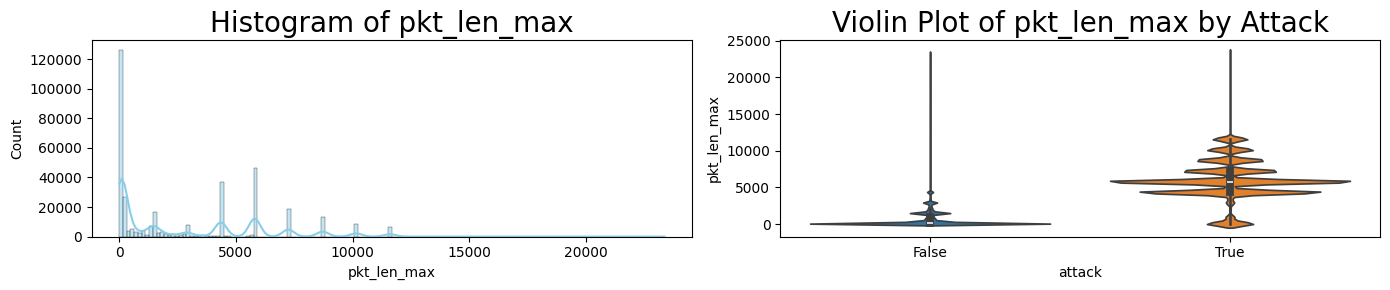

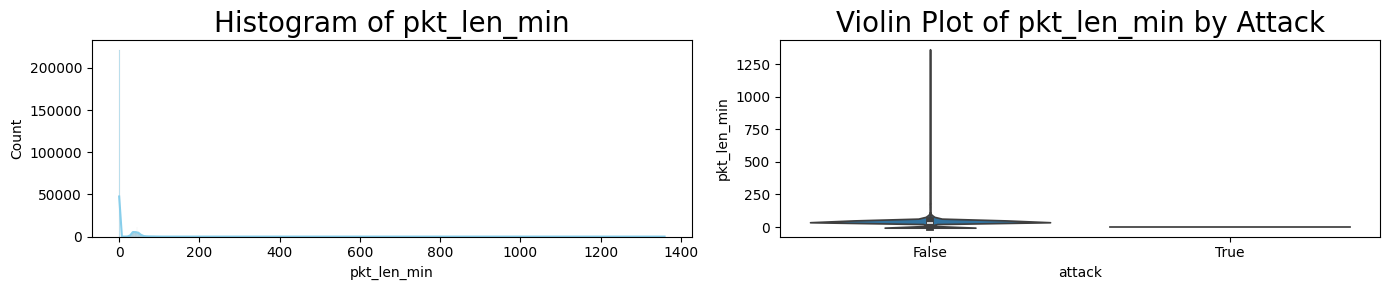

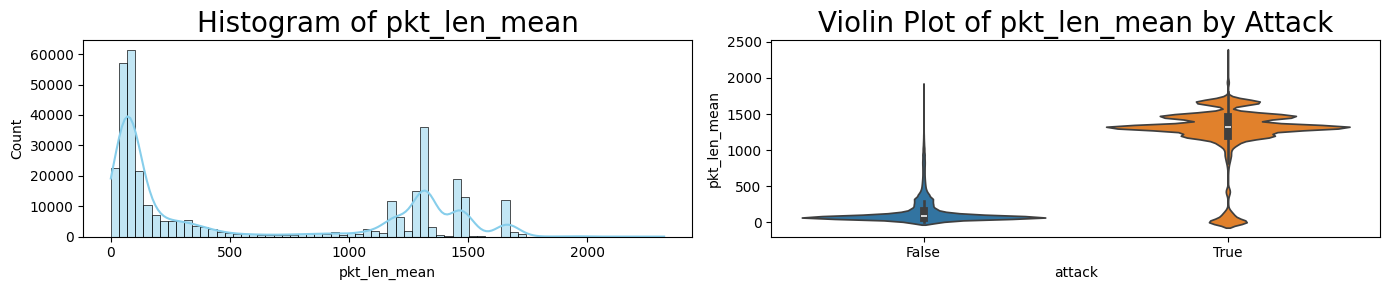

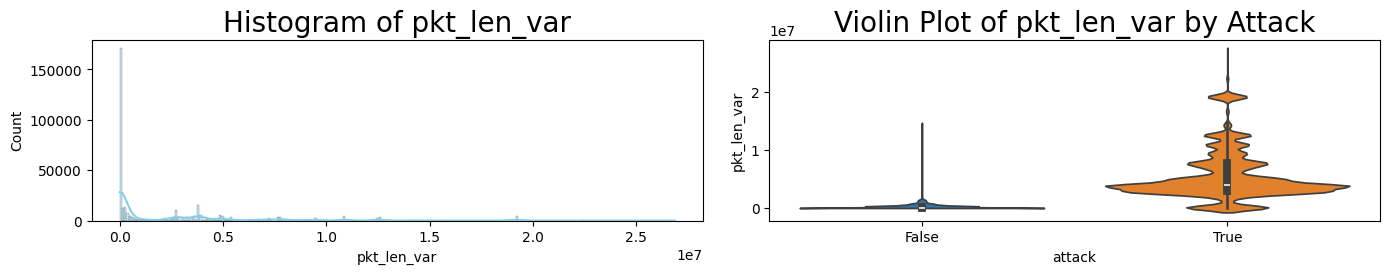

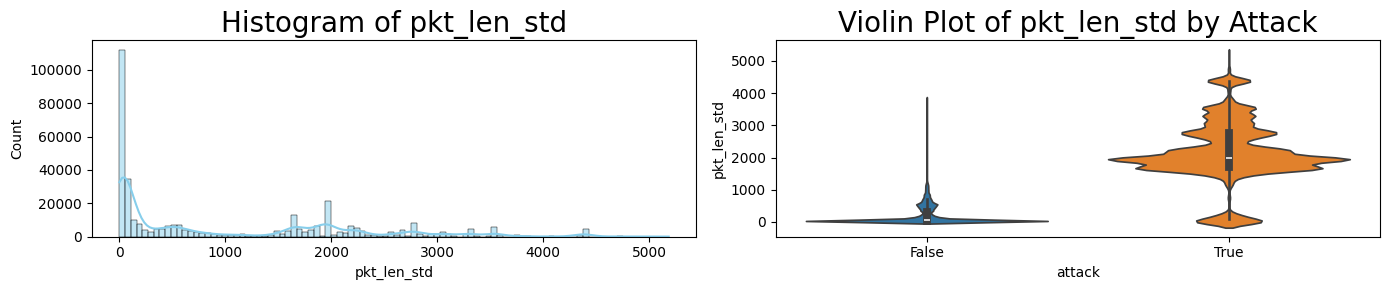

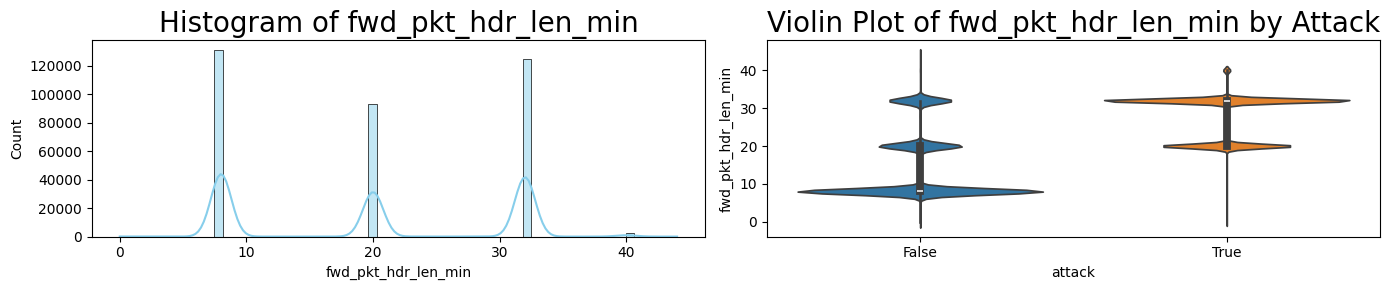

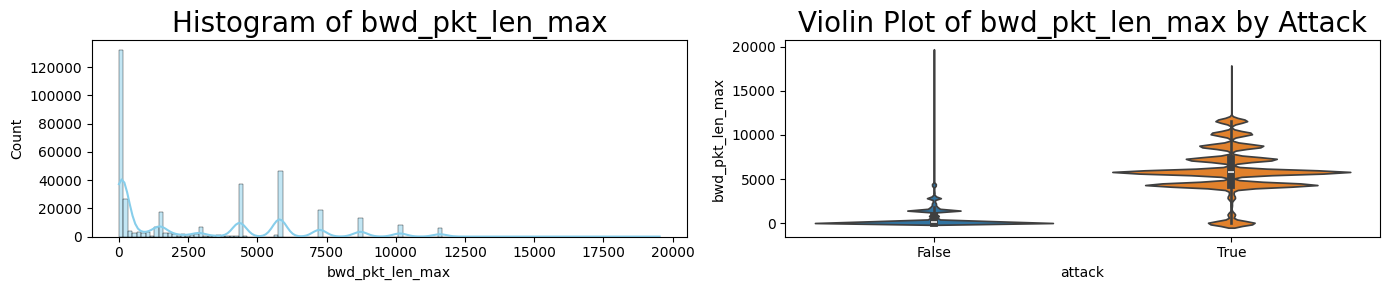

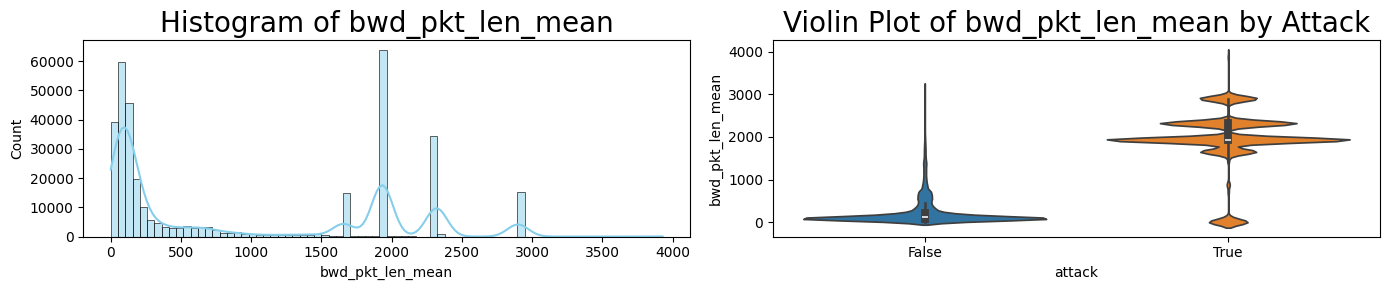

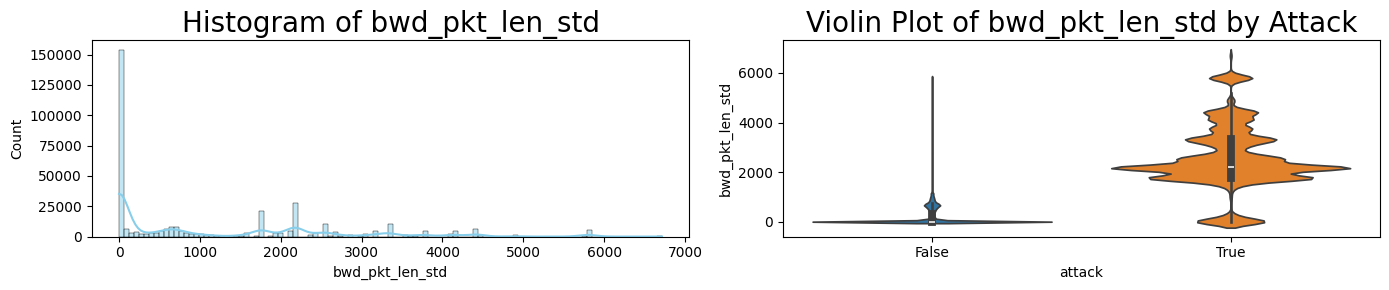

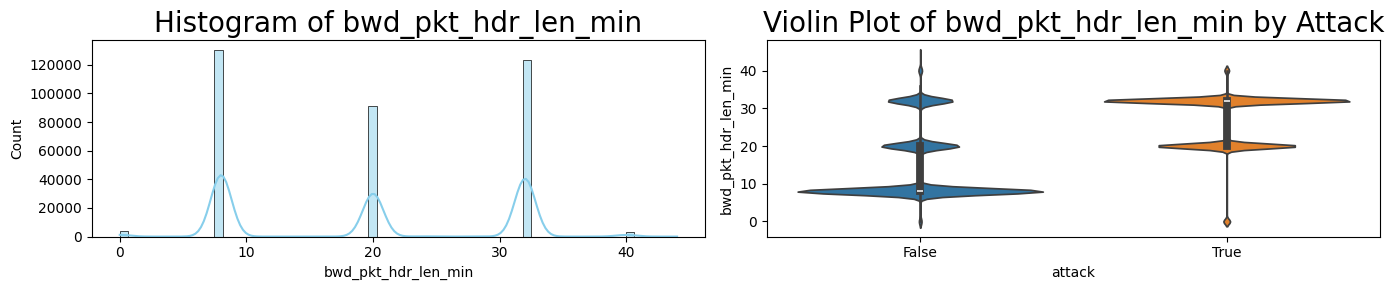

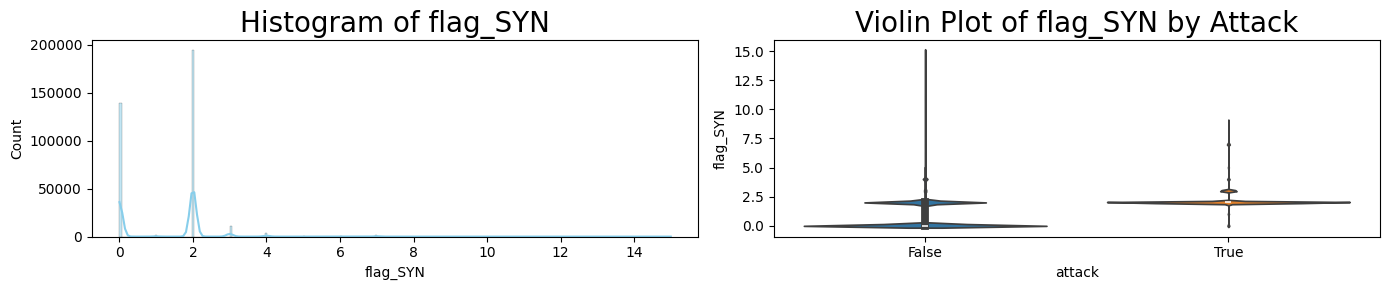

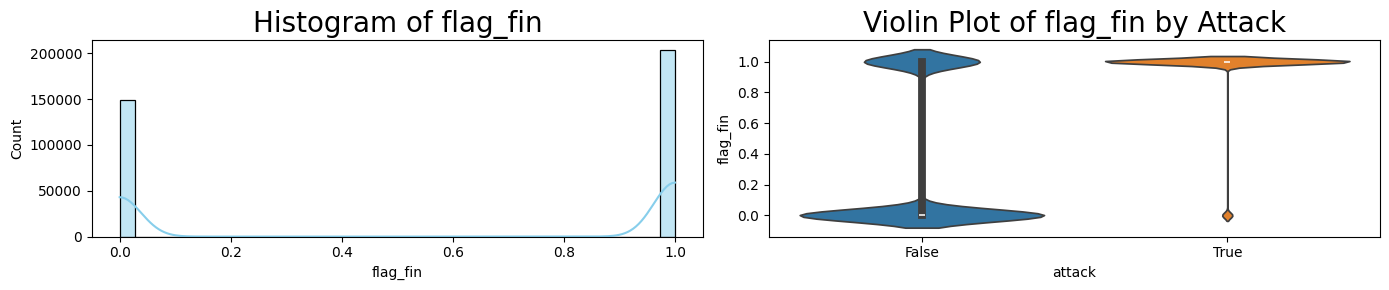

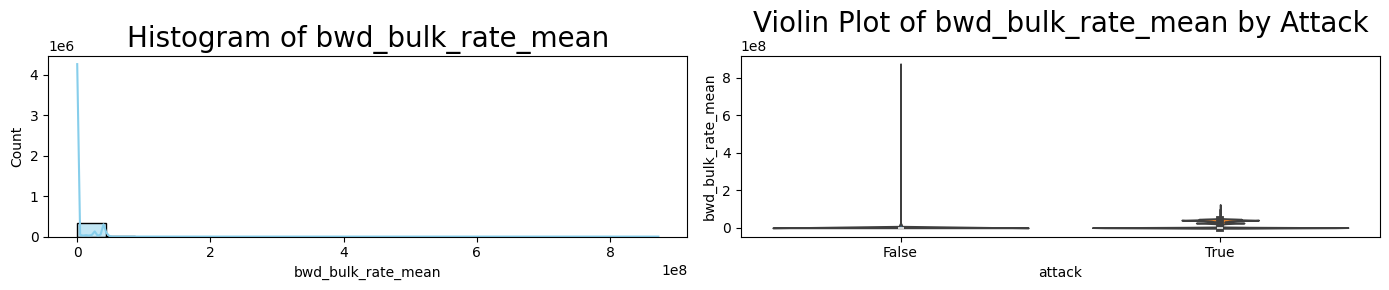

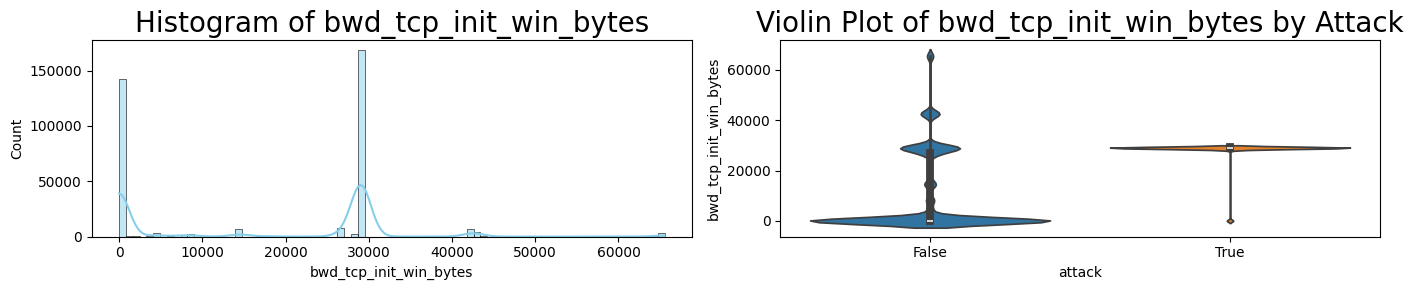

In [21]:
# Filter features with |correlation| > 0.5 w.r.t Attack and compare
target_corr = correlation_matrix['attack'].drop('attack')
for feature in target_corr[abs(target_corr) > 0.5].index.tolist():
    compare_feature_target(feature)